In [312]:
import pandas as pd
import numpy as np
from numpy import median
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 999)

In [313]:
data_path = "C:/Users/armcl/Python/Springboard_Cap1/Data/" #Home
#data_path = "C:/Users/yyzhao/python/Springboard/Capstone1/Data/" #Work

In [314]:
#Read cleaned redfin and airbnb data
redfin = pd.read_csv(data_path + "redfin_clean_scc.csv")
airbnb = pd.read_csv(data_path + "airbnb_clean_scc.csv")

In [315]:
redfin.head(3)

,SOLD DATE,PROPERTY TYPE,CITY,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE,QUARTER,Q_1,Q_2,Q_3,Q_4,TOTAL SIZE,sale_num_zip,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_FACEBOOK,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,Percentage Standard Met and Above,Violent_Crime,Property_Crime,Crime
0,July-2-2019,Single Family Residential,SANTA CLARA,95054,1050000.0,3.0,2.0,1097.0,6242.0,1961.0,117.0,37.389165,-121.947778,3,0,0,1,0,7339.0,300,7.831138,6.021112,5.013714,12.849711,12.520029,7.025839,4.615506,4.327803,9.134459,4.982873,4.813922,4.863905,1.398783,1.877193,51.005,18.6,30.0,48.6
1,April-19-2018,Condo/Co-op,SANTA CLARA,95054,882000.0,1.0,1.0,865.0,865.0,2005.0,383.0,37.396173,-121.943140,2,0,1,0,0,1730.0,300,7.952171,6.533607,5.545432,12.830049,12.628724,7.270338,4.962220,4.807594,9.642046,5.245473,5.055797,4.998462,1.289921,2.196742,51.005,18.6,30.0,48.6
2,October-20-2017,Condo/Co-op,SANTA CLARA,95054,680000.0,1.0,1.0,900.0,900.0,2005.0,390.0,37.396330,-121.943234,4,0,0,0,1,1800.0,300,7.944713,6.537169,5.550320,12.820348,12.620936,7.265331,4.959864,4.818334,9.652188,5.257395,5.050900,4.991439,1.280373,2.208670,51.005,18.6,30.0,48.6


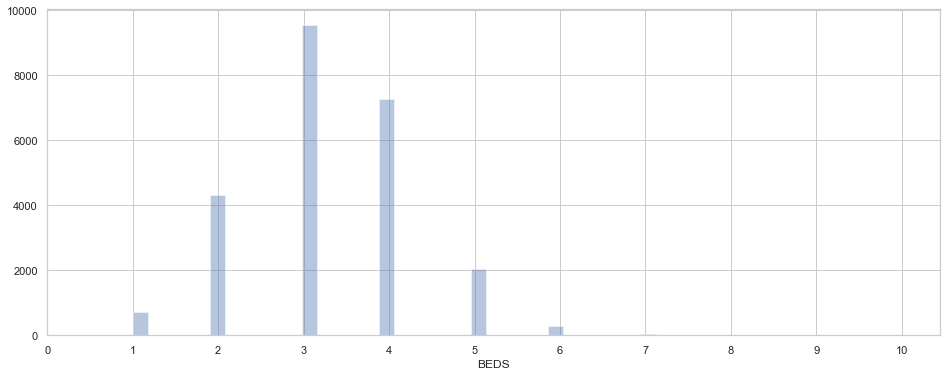

In [316]:
#Distribution of # of beds
plt.figure(figsize=(16, 6))
ax = sns.distplot(redfin['BEDS'], kde=False)
plt.xticks(np.arange(0, 11, step=1))
plt.show()

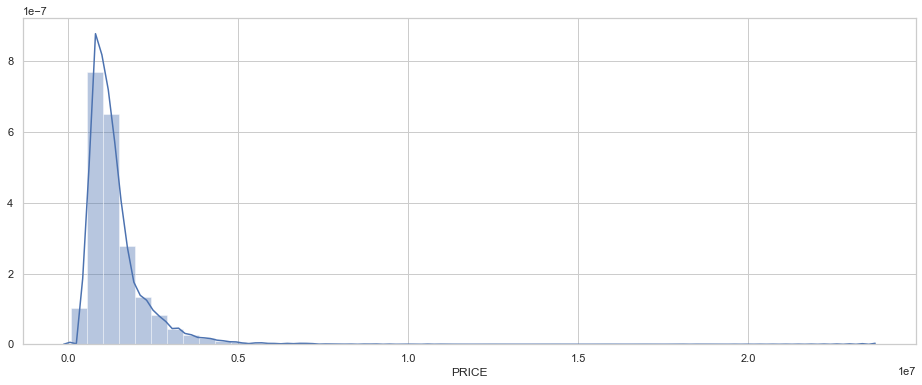

In [317]:
#Plot the distribution of price
#Long tail on the right
plt.figure(figsize=(16, 6))
ax = sns.distplot(redfin['PRICE'])
plt.show()

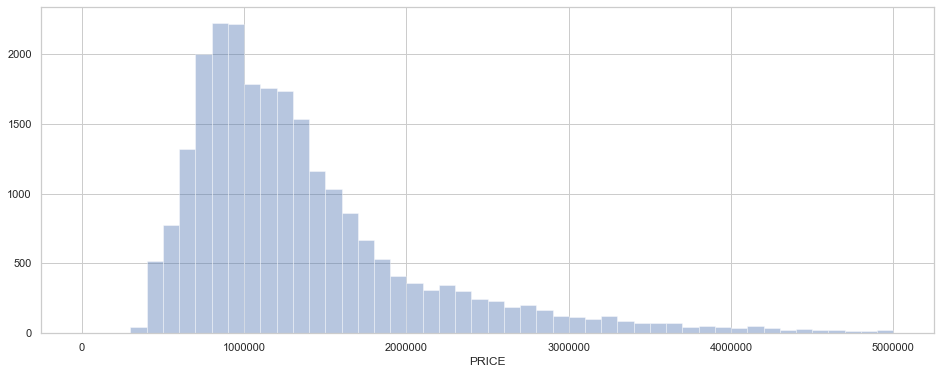

In [318]:
#Plot the distribution of price from 0 to 500K
plt.figure(figsize=(16, 6))
ax = sns.distplot(redfin['PRICE'], kde=False, hist_kws={"range": [0, 5000000]})
plt.show()

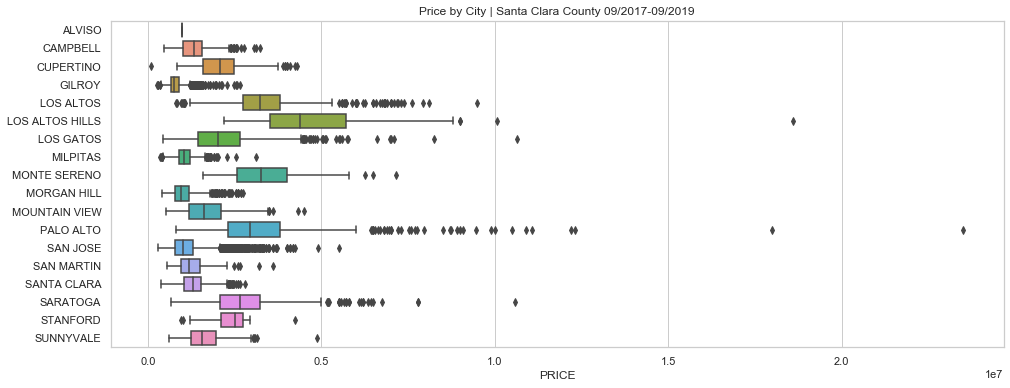

In [319]:
#Price by city
#Cities with >$5mm houses tend to be Los Altos, Los Altos Hills, Los Gatos, Palo Alto, and Saratoga
plt.figure(figsize=(16, 6))
redfin = redfin.sort_values(by=['CITY'])
ax = sns.boxplot(x="PRICE", y="CITY", orient="h", data=redfin)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Price by City | Santa Clara County 09/2017-09/2019")
ax.set_ylabel('')

plt.show()

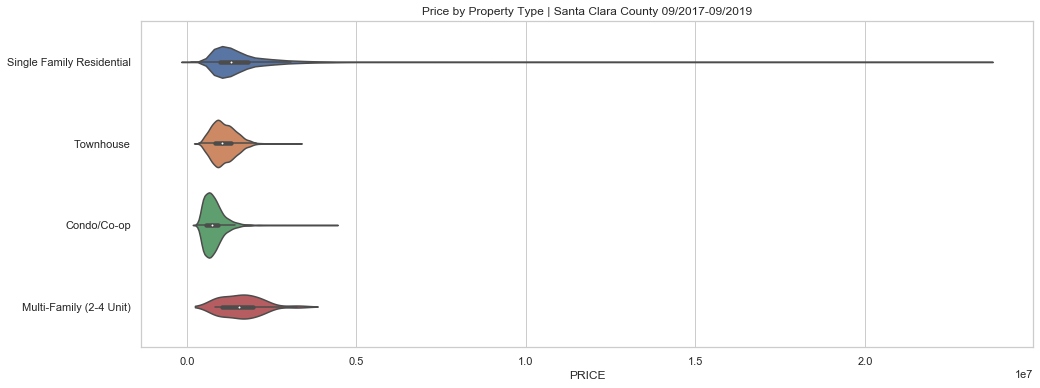

In [320]:
#Price by property type
#SFH has long tails, condo has lowest median price and MFH highest
plt.figure(figsize=(16, 6))
ax = sns.violinplot(x="PRICE", y="PROPERTY TYPE", orient="h", data=redfin)
ax.set_title("Price by Property Type | Santa Clara County 09/2017-09/2019")
ax.set_ylabel('')

plt.show()

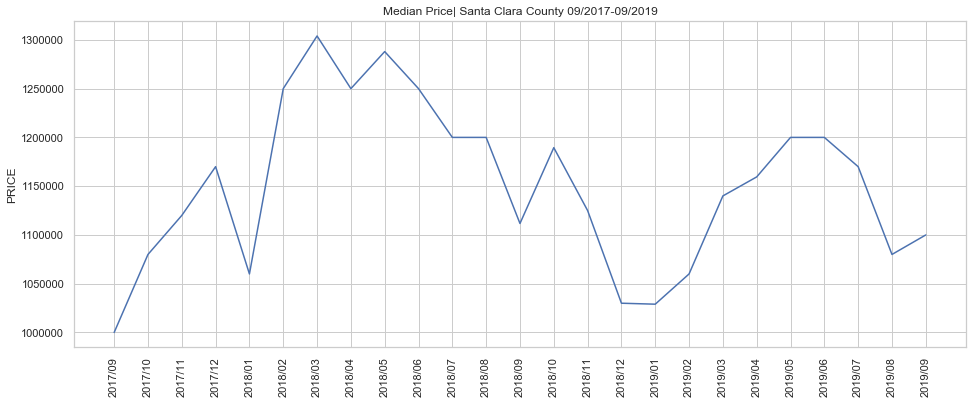

In [321]:
#House price trend in the last 2 years
#It rose to the highest in Q2/2018 and dropped like a rock; then came back in Q2/2019 and 
#dropped again in Q3. There's both cyclical trend and time series trend

redfin['Date'] = pd.to_datetime(redfin['SOLD DATE']).dt.strftime('%Y/%m')
#redfin
redfin = redfin.sort_values(by=['Date'])
redfin_median = redfin.groupby('Date').median()

plt.figure(figsize=(16, 6))
ax = sns.lineplot(x=redfin_median.index, y="PRICE", data=redfin_median)
plt.xticks(plt.xticks()[0], redfin_median.index, rotation=90)
ax.set_xlabel('')
ax.set_title("Median Price| Santa Clara County 09/2017-09/2019")
#plt.tight_layout()
plt.show()

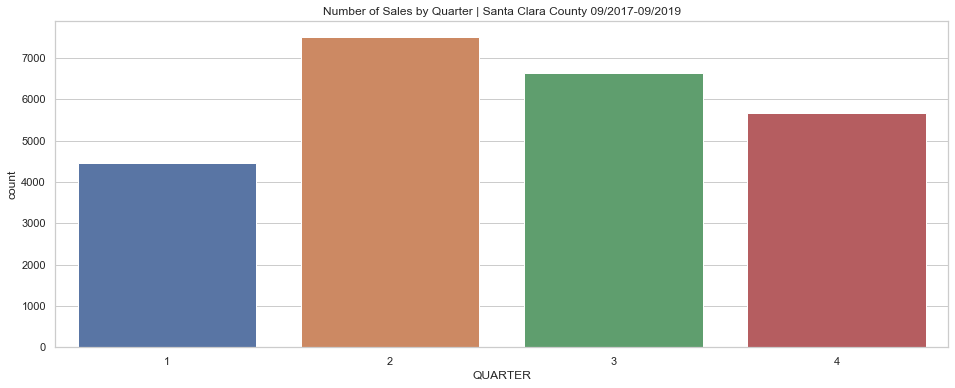

In [322]:
#Hypothesis: more sales in spring and summer
#Count the num of sales in each quarter. Surprisingly Q1 is less than Q4！
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="QUARTER", data=redfin)
ax.set_title("Number of Sales by Quarter | Santa Clara County 09/2017-09/2019")
plt.show()

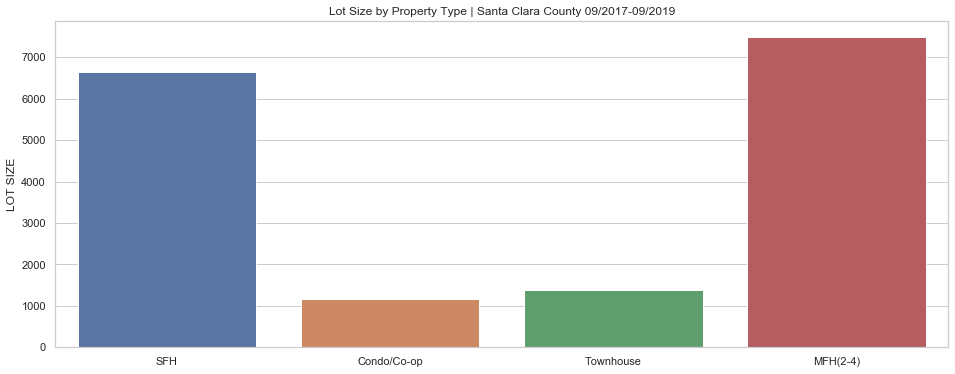

In [323]:
#Hypothesis: Condo/Townhouse have smaller lot size

redfin['PROPERTY TYPE'].replace({'Single Family Residential':'SFH', 
                                 'Multi-Family (2-4 Unit)':'MFH(2-4)'}, inplace=True)

plt.figure(figsize=(16, 6))
ax = sns.barplot(x="PROPERTY TYPE", y="LOT SIZE", data=redfin, estimator=median, ci=None)
ax.set_title("Lot Size by Property Type | Santa Clara County 09/2017-09/2019")
ax.set_xlabel('')
plt.show()

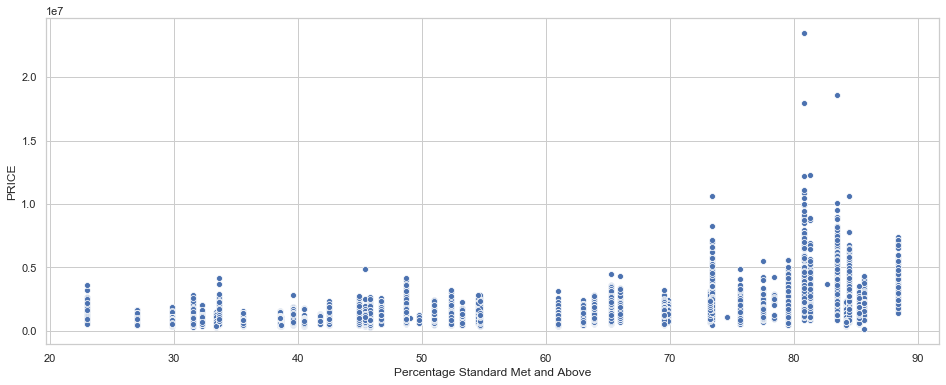

In [324]:
#Hypothese: Better schools, higher price
#The schools data are by zipcodes that's why the vertial dots
#Seems there's overall a positive relationship but not much trend when scores < 50
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="Percentage Standard Met and Above", y="PRICE", data=redfin)
plt.show()

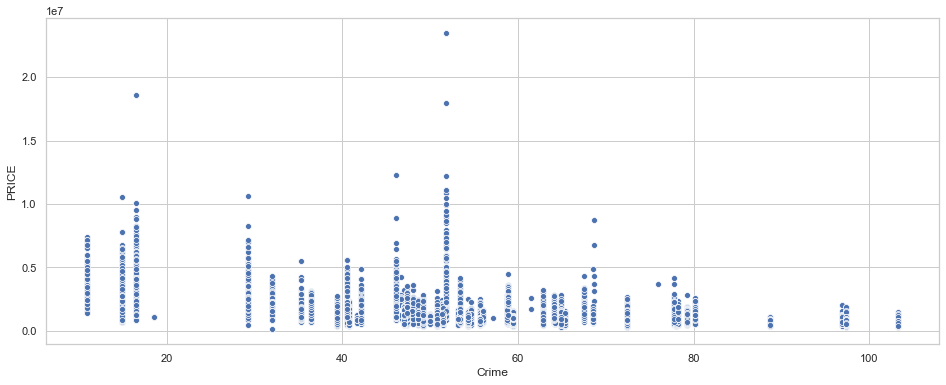

In [325]:
#Hypothese: Lower crimes, higher price
#The crime data are by zipcodes that's why the vertial dots
#Seems when crime is moderate to low (<50) no one cares, but negatively affact price when it
#gets higher (extremely high crime areas)
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="Crime", y="PRICE", data=redfin)
plt.show()

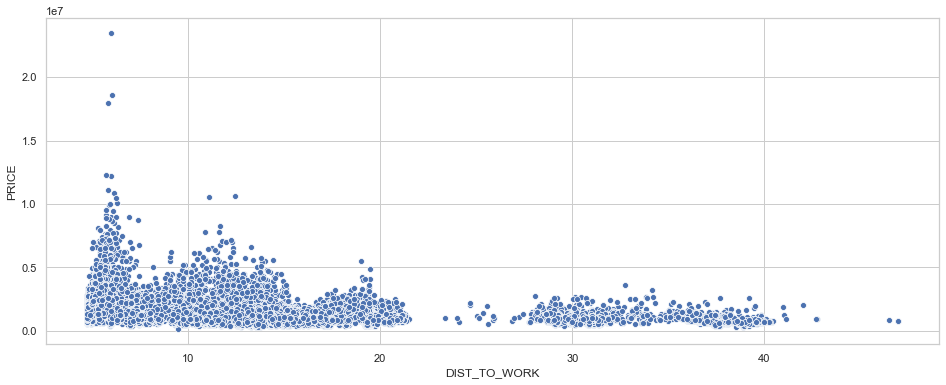

In [326]:
#Hypothese: closer to landmarks, higher price
#Generally it's true, although with some humps (deals?)
#When miles is > 20 it doesn't matter much
redfin['DIST_TO_WORK'] = (redfin['DIST_TO_OLD_APPLE'] + redfin['DIST_TO_NEW_APPLE'] + 
                          redfin['DIST_TO_GOOGLE'] + redfin['DIST_TO_SV_STATION'] +
                          redfin['DIST_TO_FACEBOOK'] + redfin['DIST_TO_PA_STATION'])/6
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="DIST_TO_WORK", y="PRICE", data=redfin)
plt.show()

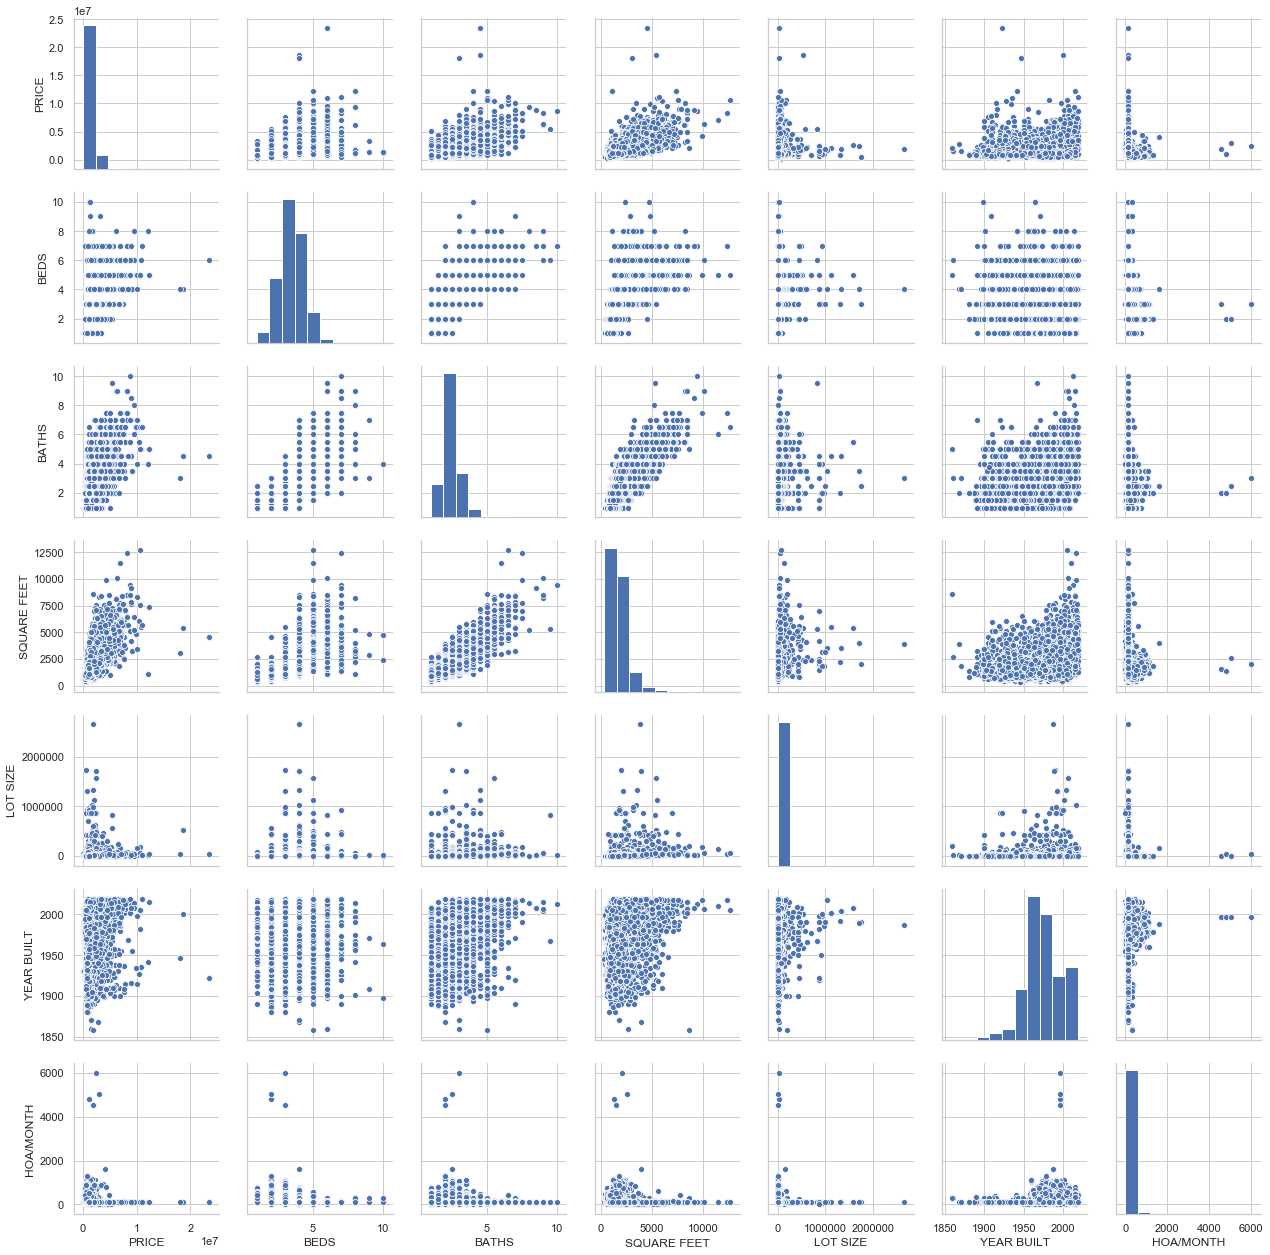

In [327]:
#pair plot essential features and price
#Square feet and year built seem to be positively related to price
#LOT SIZE exhibits negative relationship which is interesting
#When beds<5, it's positive relationship but after 5 it's negative probably because those
#houses are in surbubs really far away from work

redfin_essential = redfin[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 
                           'YEAR BUILT', 'HOA/MONTH']]

g = sns.pairplot(redfin_essential)

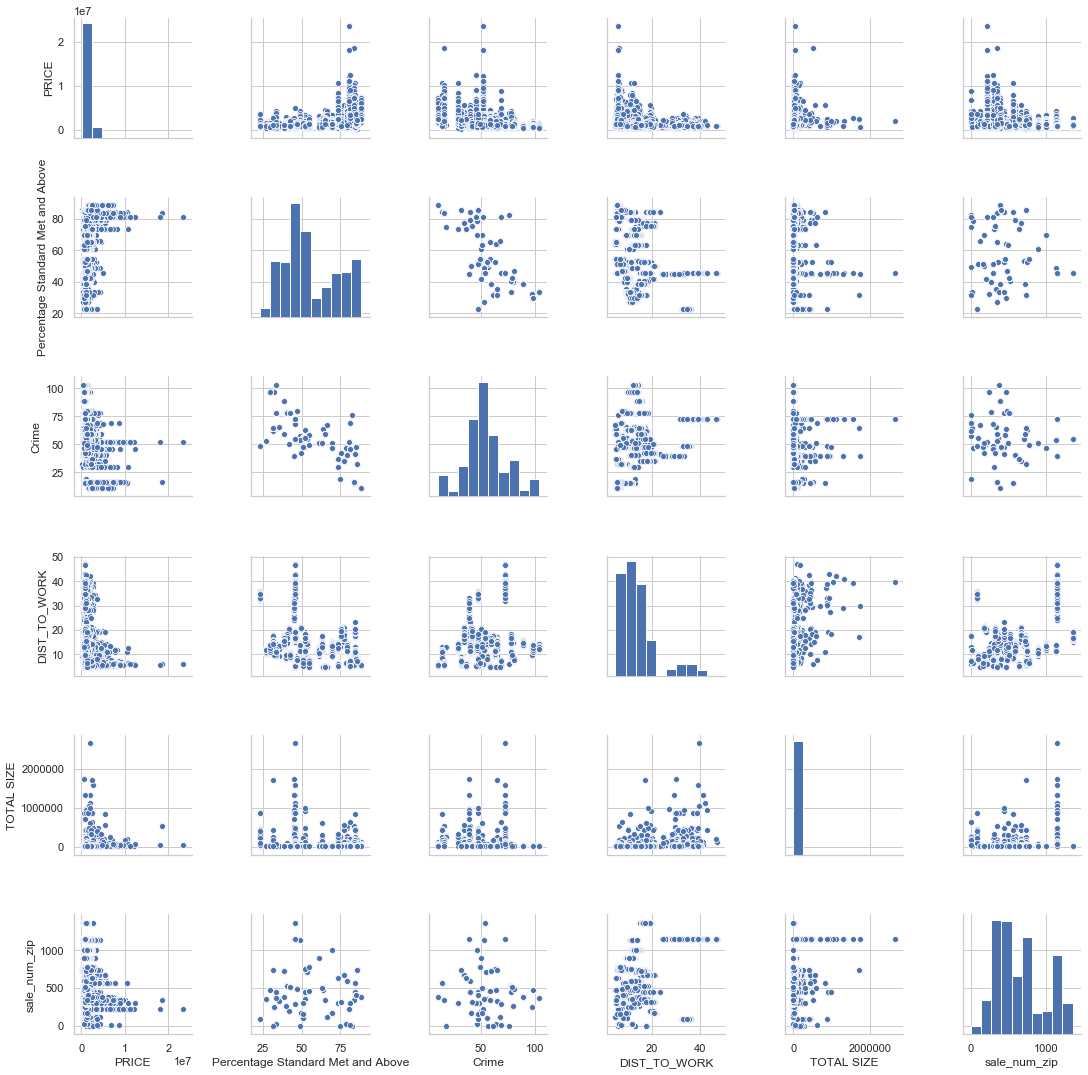

In [328]:
#pair plot added-on features and price
#Seems school, crime, and distance are important features

redfin_added = redfin[['PRICE', 'Percentage Standard Met and Above', 'Crime', 'DIST_TO_WORK',
                          'TOTAL SIZE', 'sale_num_zip']]

g = sns.pairplot(redfin_added)

C:\Users\armcl\Anaconda3\lib\site-packages\matplotlib\colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


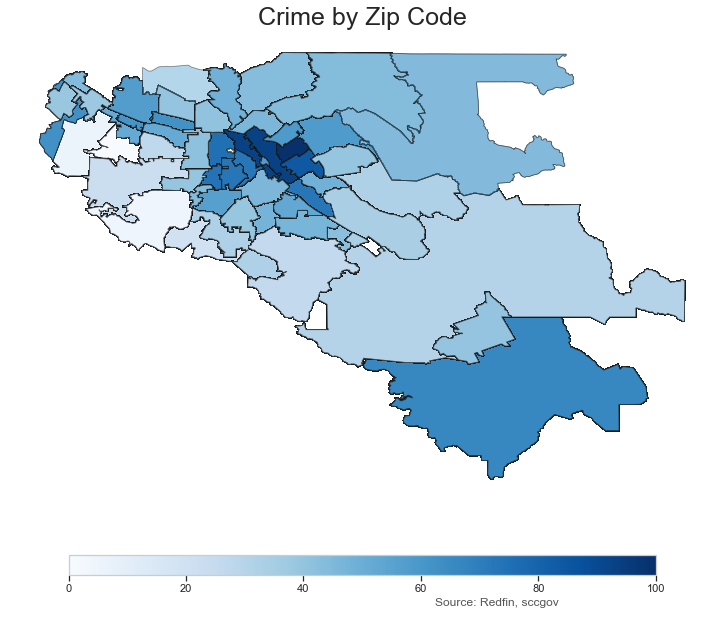

In [350]:
#Let's make a map!
import geopandas as gpd


#SF Bay Area shape file by city
#map_df = gpd.read_file(data_path + "ba_map/city/vj593xs7263.shp")

#Santa Clara County shape file by zip code
map_df = gpd.read_file(data_path + "ba_map/zipcode_scc/Zip_Codes.shp")
#SF Bay Area shape file by zip code
#map_df = gpd.read_file(data_path + "ba_map/zipcode_scc/Zip_Codes.shp")

#map_df.plot()


# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
#map_df
#plt.rcParams['figure.figsize'] = [50, 70] #height, width
#map_df.plot()

redfin['ZIP OR POSTAL CODE'] = redfin['ZIP OR POSTAL CODE'].astype(str)
#redfin['ZIP OR POSTAL CODE'] = redfin['ZIP OR POSTAL CODE'].astype(str)

map_df = map_df.drop(columns=['LATITUDE','LONGITUDE'])

merged = map_df.set_index('ZCTA').join(redfin.set_index('ZIP OR POSTAL CODE'))
#merged = merged[['POPULATION','FAMILIES','MALE','FEMALE','WHITE','BLACK','ASIAN_PACI',
#                'CHINESE','HISPANIC_O','geometry','PROPERTY TYPE','CITY','PRICE','BEDS',
#                'BATHS','SQUARE FEET','LOT SIZE','YEAR BUILT','HOA/MONTH','TOTAL SIZE',
#               'sale_num_zip','Percentage Standard Met and Above','Violent_Crime',
#               'Property_Crime','Crime','DIST_TO_WORK']]
#merged
#fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# set the value column that will be visualised
variable = 'Crime'

# set the range for the choropleth values
vmin, vmax = 0, 100

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 10))

# remove the axis
ax.axis('off')

# add a title and annotation
ax.set_title(variable + ' by Zip Code', fontdict={'fontsize': '25', 'fontweight' : '3'})
ax.annotate('Source: Redfin, sccgov', xy=(0.6, .05), xycoords='figure fraction', fontsize=12, color='#555555')

# Create colorbar legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm.set_array([]) # or alternatively sm._A = []. Not sure why this step is necessary, but many recommends it

# add the colorbar to the figure
fig.colorbar(sm, orientation="horizontal", fraction=0.036, pad=0.1, aspect = 30)

# create map
merged.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax,
           alpha=0.5, edgecolor='k')


# import contextily as ctx
# merged = merged.to_crs(epsg=3857)
# #fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# #contextily.add_basemap(ax)
# #plt.show()

# # Dataframe you want to plot
# gdf = gpd.GeoDataFrame(merged, crs= {"init": "epsg:4326"}) # Create a georeferenced dataframe  
# gdf = gdf.to_crs(epsg=3857) # reproject it in Web mercator
# ax = gdf.plot()

# # choose any of the supported maps from ctx.sources
# ctx.add_basemap(ax, url=ctx.sources.ST_TERRAIN)
# ax.set_axis_off()
# plt.show()

In [352]:
#Airbnb data storytelling
airbnb.head(3)

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified,city,state,zipcode,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_days,first_review_days,last_review_days,air_conditioning,bbq_grill,bed_linens,carbon_monoxide_detector,children’s_books_and_toys,coffee_maker,cooking_basics,dvd_player,dishes_and_silverware,ev_charger,en_suite_bathroom,espresso_machine,extra_pillows_and_blankets,family/kid_friendly,fire_extinguisher,fire_pit,first_aid_kit,formal_dining_area,free_parking_on_premises,free_street_parking,full_kitchen,garden_or_backyard,hbo_go,hair_dryer,host_greets_you,hot_tub,hot_water,indoor_fireplace,jetted_tub,lake_access,laptop_friendly_workspace,lock_on_bedroom_door,long_term_stays_allowed,luggage_dropoff_allowed,memory_foam_mattress,mini_fridge,pack_’n_play/travel_crib,patio_or_balcony,pets_allowed,pets_live_on_this_property,private_bathroom,private_entrance,private_hot_tub,private_living_room,self_check-in,shared_pool,single_level_home,smoke_detector,smoking_allowed,sound_system,suitable_for_events,washer_/_dryer,wheelchair_accessible,wine_cooler,balcony,bathtub,breakfast,cat(s),crib,dishwasher,dog(s),dryer,essentials,gym,heating,internet,iron,kitchen,microwave,netflix,oven,pool,printer,refrigerator,shampoo,stove,tv,terrace,washer,waterfront,wifi,num_amenities,review_scores_dummy,DIST_TO_GOOGLE,DIST_TO_OLD_APPLE,DIST_TO_NEW_APPLE,DIST_TO_FACEBOOK,DIST_TO_PA_STATION,DIST_TO_MV_STATION,DIST_TO_SV_STATION,DIST_TO_WF_MALL,DIST_TO_NETFLIX,DIST_TO_SJ_DOWNTOWN,DIST_TO_LINKEDIN,DIST_TO_AMAZON_LAB,DIST_TO_LEVIS,DIST_TO_SJC,Percentage Standard Met and Above,Violent_Crime,Property_Crime
0,4952,within an hour,100.0,t,5.0,t,f,Palo Alto,CA,94301.0,37.43972,-122.15672,Villa,Private room,2,2.0,1.0,1.0,Real Bed,90.0,440.0,1428.0,0.0,35.0,1,45.0,2,365,2,2,365,365,2.0,365.0,0,0,0,4,75,2,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,5,0,0.62,5,0,3818.0,3628.0,178.0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,0,1,0,1,32,1,4.179442,10.181171,10.889574,3.178463,0.527877,5.445437,8.113517,14.053778,16.473311,16.272954,7.384407,7.146751,10.873841,13.499502,80.7950,20.7,31.1
1,21373,within an hour,100.0,t,5.0,t,f,Palo Alto,CA,94301.0,37.44001,-122.15667,Villa,Private room,1,2.0,1.0,1.0,Real Bed,99.0,600.0,2000.0,0.0,35.0,1,100.0,2,730,2,2,730,730,2.0,730.0,1,14,22,275,231,58,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,5,0,2.08,5,0,3818.0,3329.0,11.0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,0,1,0,0,1,1,1,1,0,1,0,1,33,1,4.182614,10.193901,10.900775,3.158278,0.519833,5.454564,8.121548,14.062598,16.486800,16.279729,7.390364,7.149993,10.875583,13.504444,80.7950,20.7,31.1
2,23732,within an hour,100.0,f,1.0,t,t,Mountain View,CA,94043.0,37.39203,-122.06675,House,Private room,2,1.0,1.0,1.0,Futon,299.0,NaN,NaN,500.0,75.0,1,25.0,1,365,1,1,365,365,1.0,365.0,30,60,90,365,3,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1,0,0.03,1,0

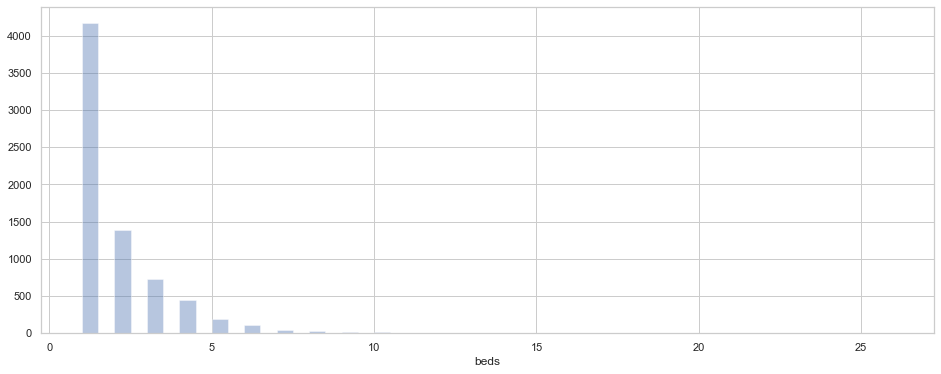

In [369]:
#Distribution of # of beds
#Compared to sold homes, airbnb listings are mostly 1 bed then starts to decrease
plt.figure(figsize=(16, 6))
ax = sns.distplot(airbnb['beds'], kde=False)
#plt.xticks(np.arange(0, 11, step=1))
plt.show()

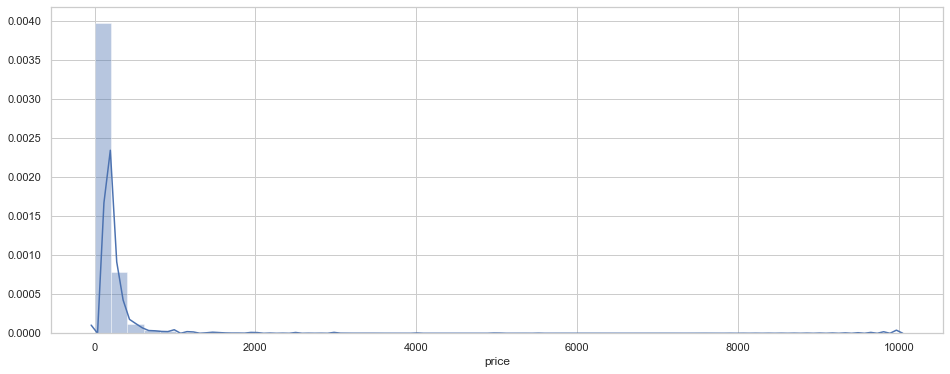

In [362]:
#Distribution of listing price
plt.figure(figsize=(16, 6))
ax = sns.distplot(airbnb['price'])
plt.show()

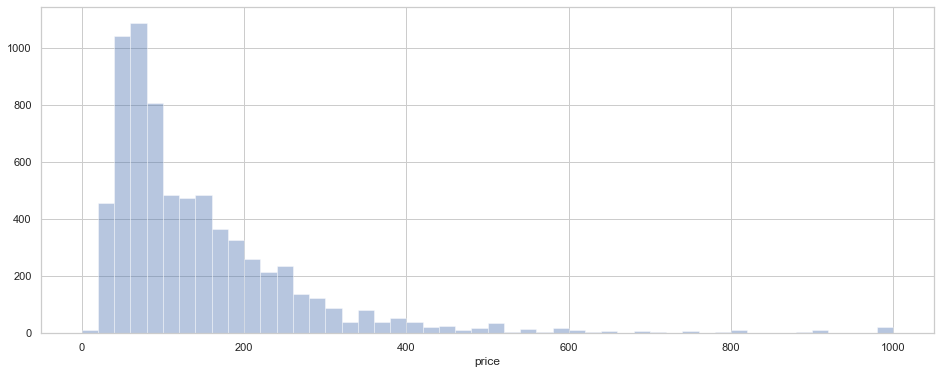

In [357]:
#Distribution of listing price limited to <1000
#The majority prices are between 0 and 200/day
plt.figure(figsize=(16, 6))
ax = sns.distplot(airbnb['price'], kde=False, hist_kws={"range": [0, 1000]})
plt.show()

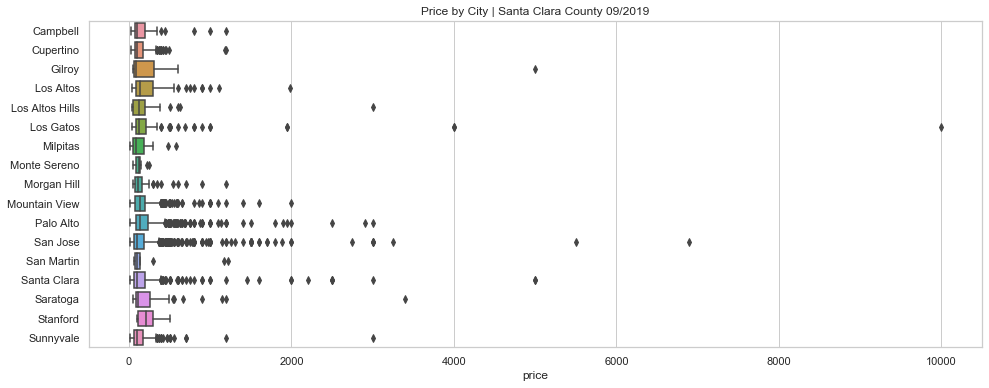

In [365]:
#Price by city
#
plt.figure(figsize=(16, 6))
airbnb = airbnb.sort_values(by=['city'])
ax = sns.boxplot(x="price", y="city", orient="h", data=airbnb)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Price by City | Santa Clara County 09/2019")
ax.set_ylabel('')

plt.show()

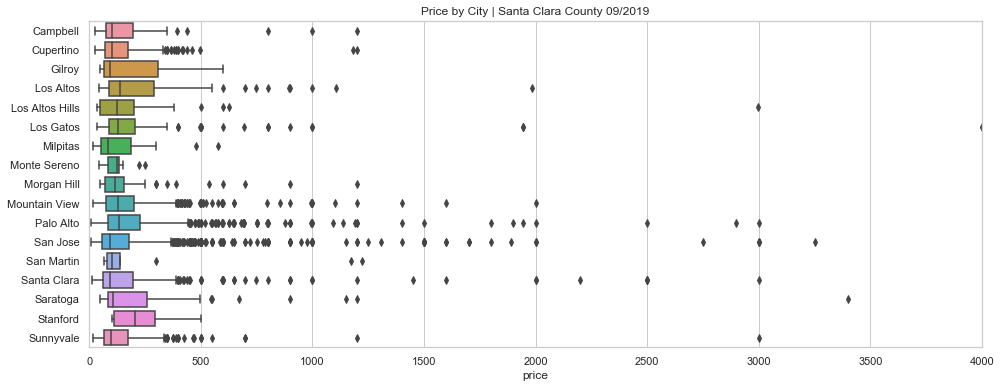

In [367]:
#Price by city
#Limited to <4000 to zoom in
#Compared to sale price, the "premium" neighborhoods do not necessarily have higher listing price on airbnb
plt.figure(figsize=(16, 6))
plt.xlim(0, 4000)
airbnb = airbnb.sort_values(by=['city'])
ax = sns.boxplot(x="price", y="city", orient="h", data=airbnb)
#ax = sns.swarmplot(x="PRICE", y="CITY", orient="h", data=redfin, color="white")
ax.set_title("Price by City | Santa Clara County 09/2019")
ax.set_ylabel('')

plt.show()

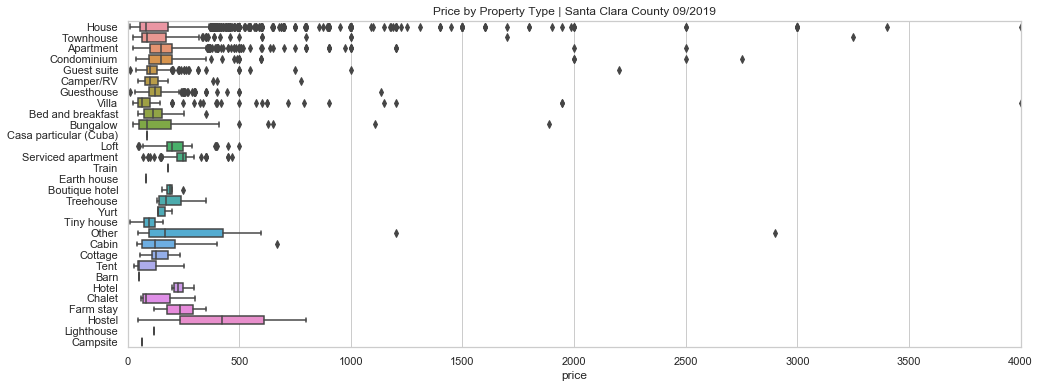

In [374]:
#Price by property type
#Interstingly, the median price for condo/apartments are higher than house/townhouse
#Houses, have some really large outliers
#As expected, tents & tiny homes are cheaper
plt.figure(figsize=(16, 6))
ax = sns.boxplot(x="price", y="property_type", orient="h", data=airbnb)
ax.set_title("Price by Property Type | Santa Clara County 09/2019")
ax.set_ylabel('')
plt.xlim(0, 4000)

plt.show()

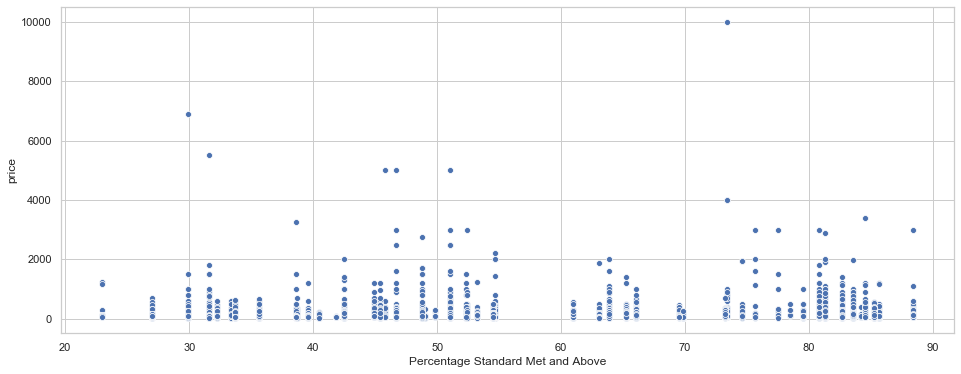

In [376]:
#Hypothese: Schools don't affect airbnb price much
#And yes, price is relatively flat across school scores

plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="Percentage Standard Met and Above", y="price", data=airbnb)
plt.show()

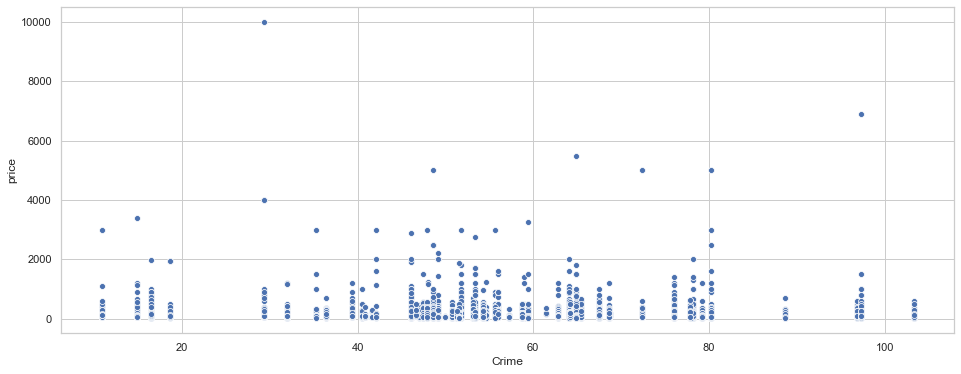

In [379]:
#Hypothese: Crime is probably not important for airbnb price
#Actually, it higher crime areas actually have slightly higher price
#Maybe it's because those areas overlap with work/entertainment/landmark places

plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="Crime", y="price", data=airbnb)
plt.show()

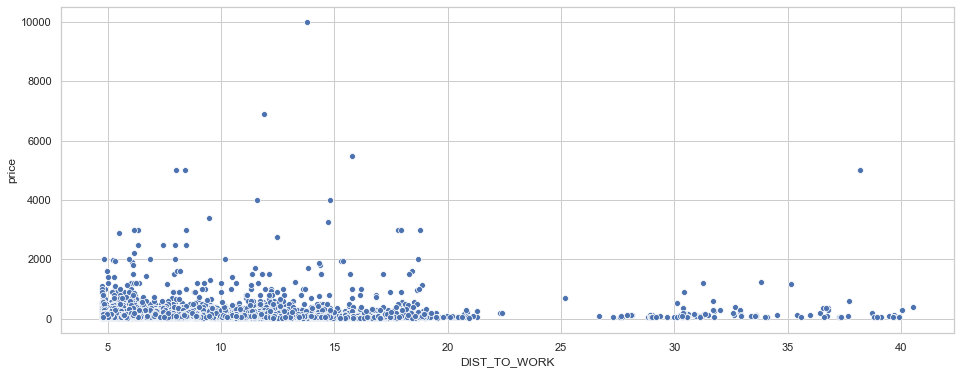

In [380]:
#Hypothese: closer to companies, higher price
#Generally it seems true
airbnb['DIST_TO_WORK'] = (airbnb['DIST_TO_OLD_APPLE'] + airbnb['DIST_TO_NEW_APPLE'] + 
                          airbnb['DIST_TO_GOOGLE'] + airbnb['DIST_TO_SV_STATION'] +
                          airbnb['DIST_TO_FACEBOOK'] + airbnb['DIST_TO_PA_STATION'])/6
plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="DIST_TO_WORK", y="price", data=airbnb)
plt.show()

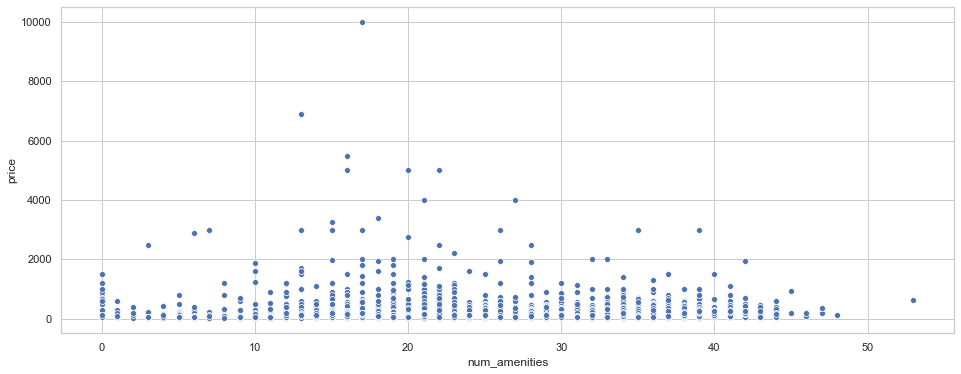

In [385]:
#Hypothese: more amenities, higher price
#Actually, it doesn't seem be the case. Most probably already list the essential amenities

plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="num_amenities", y="price", data=airbnb)
plt.show()

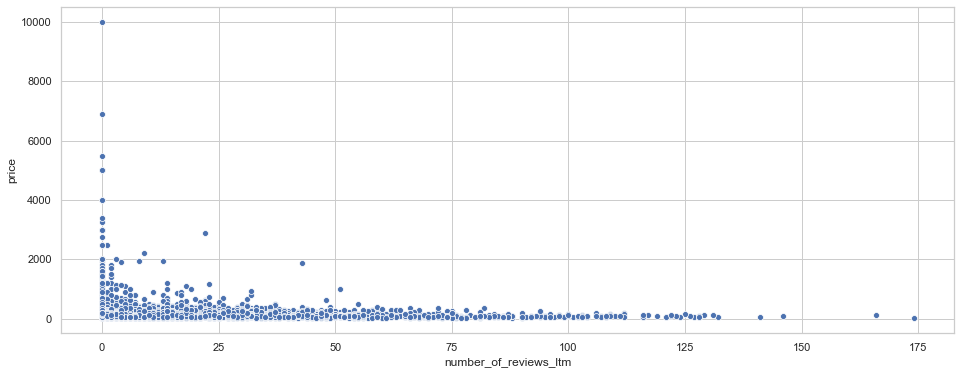

In [388]:
#Hypothese: less reviews, lower price for asymmetric information discount
#Actually not the case, maybe there're more reviews because it's cheaper and more people booked

plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="number_of_reviews_ltm", y="price", data=airbnb)
plt.show()

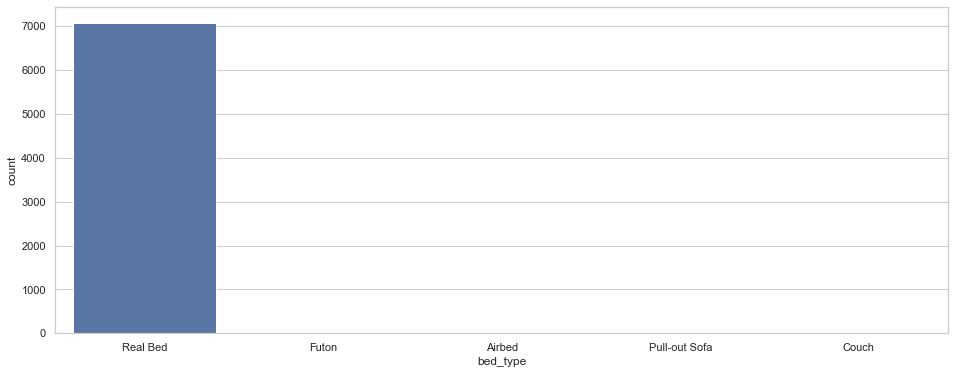

In [390]:
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))
ax = sns.countplot(x="bed_type", data=airbnb)
#ax.set_title("Number of Sales by Quarter | Santa Clara County 09/2017-09/2019")
plt.show()

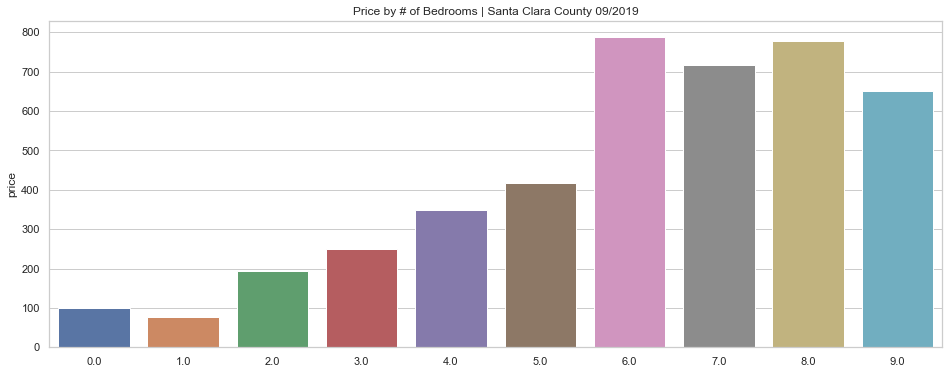

In [400]:
#Hypothesis: more beds, more expensive
#It's generally true although flat after 6
airbnb_beds = airbnb.loc[airbnb['bedrooms']<10,:]
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="bedrooms", y="price", data=airbnb_beds, estimator=median, ci=None)
ax.set_title("Price by # of Bedrooms | Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

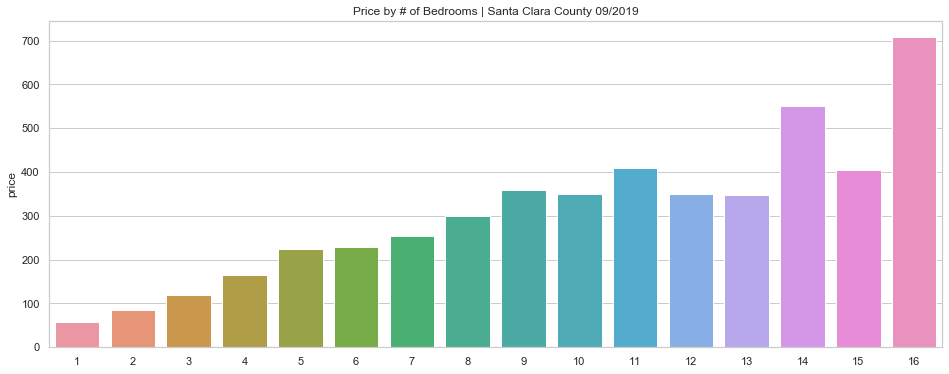

In [401]:
#Hypothesis: more accomodates, more expensive
#It's generally true
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="accommodates", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by # of Accommodates | Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

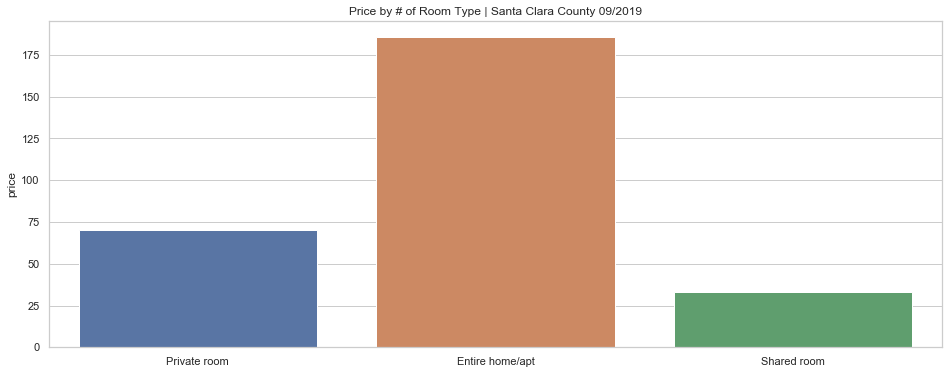

In [402]:
#Hypothesis: privacy costs more
#This is pretty clear
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="room_type", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by # of Room Type | Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

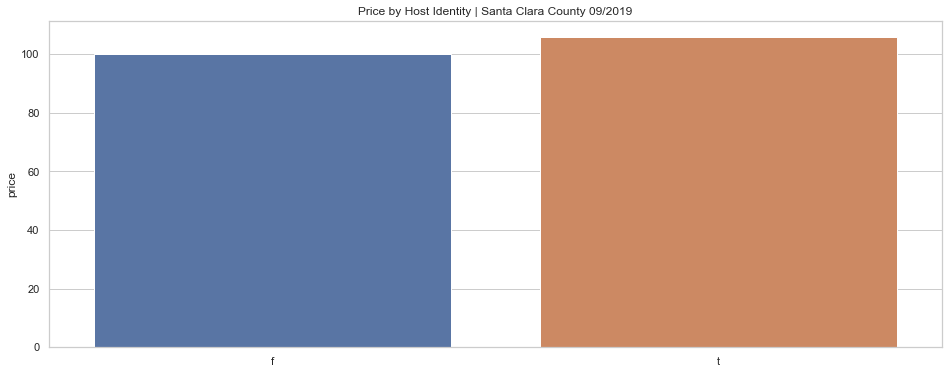

In [404]:
#Hypothesis: host identity verifed higher price
#marginally higher
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="host_identity_verified", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by Host Identity | Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

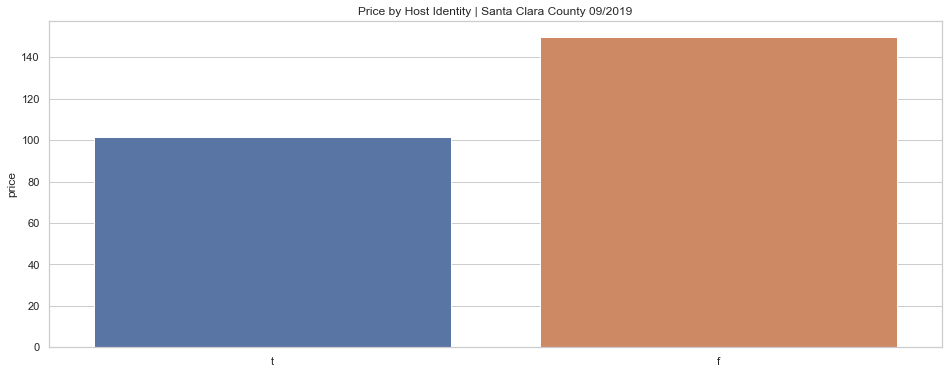

In [405]:
#Hypothesis: host picturs more trust and higher price
#This seems correct
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="host_has_profile_pic", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by Host Profile Picture | Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

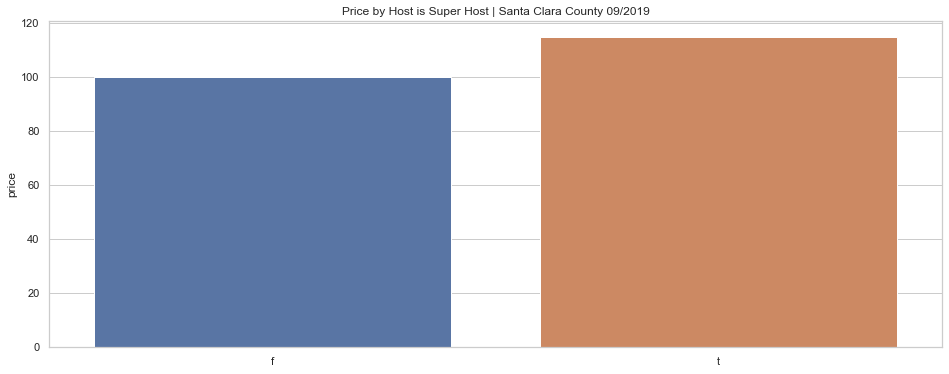

In [408]:
#Hypothesis: super host more experiences and higher price
#This seems correct
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="host_is_superhost", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by Host is Super Host | Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

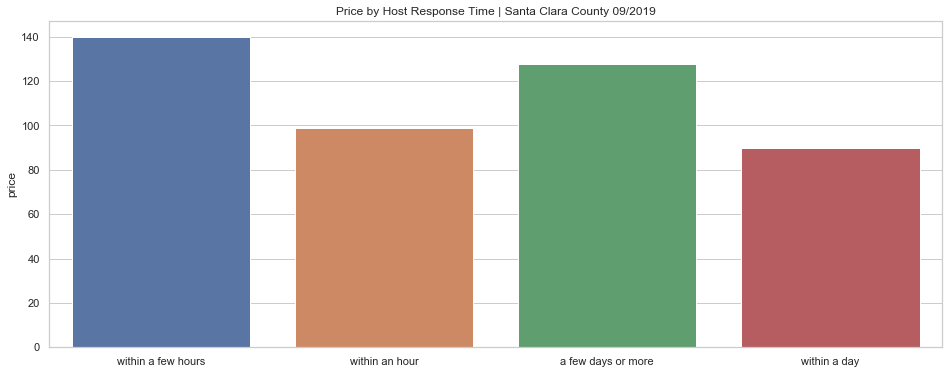

In [410]:
#Hypothesis: slower reaction lower price
#This doesn't seem to matter
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="host_response_time", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by Host Response Time | Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

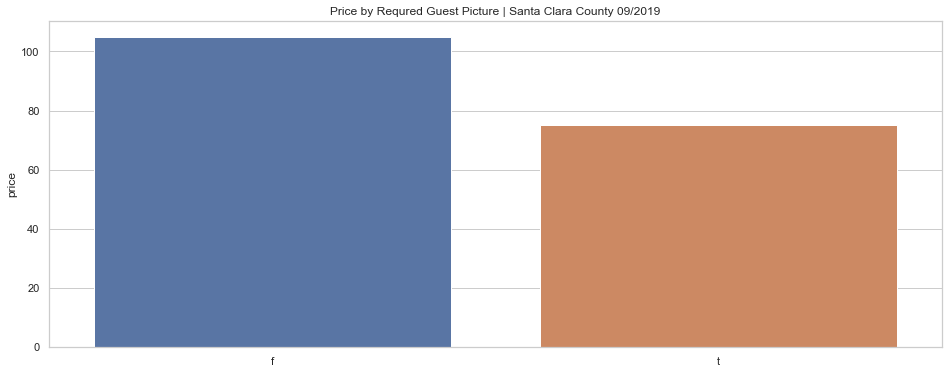

In [425]:
#Hypothesis: if request guest pictures, there's a discount because it's less convenient
#This seems true!
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="require_guest_profile_picture", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by Requred Guest Picture | Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

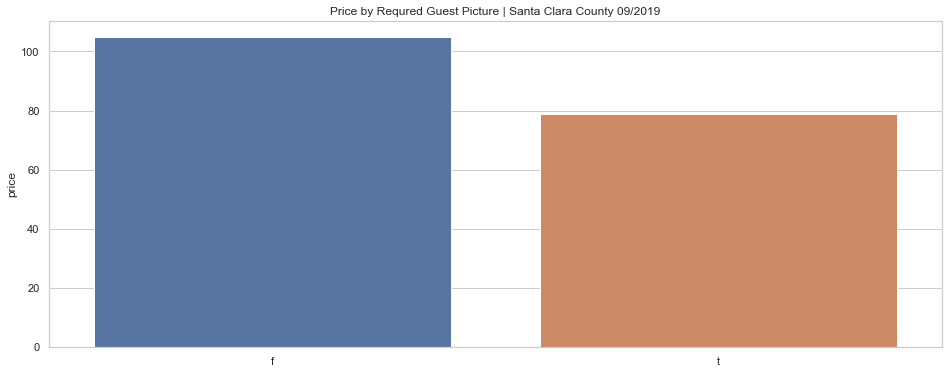

In [426]:
#Hypothesis: if request guest pictures, there's a discount because it's less convenient
#This seems true!
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="require_guest_phone_verification", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by Requred Guest Picture | Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

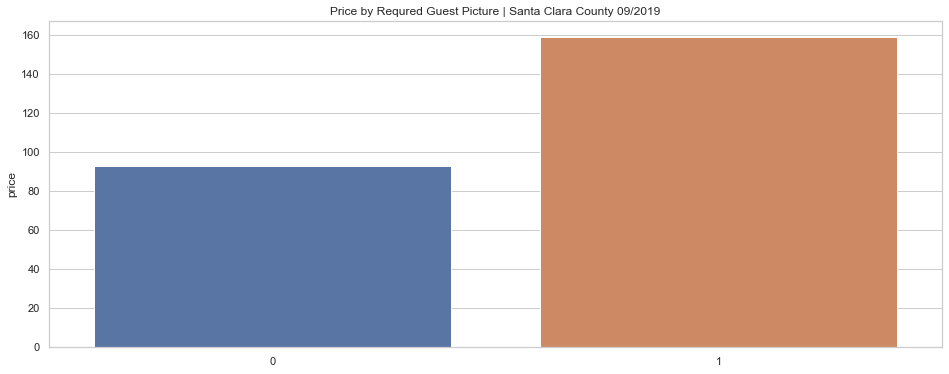

In [432]:
#Hypothesis: family/kids friendly costs more
#This seems true!
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="family/kid_friendly", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by Requred Guest Picture | Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

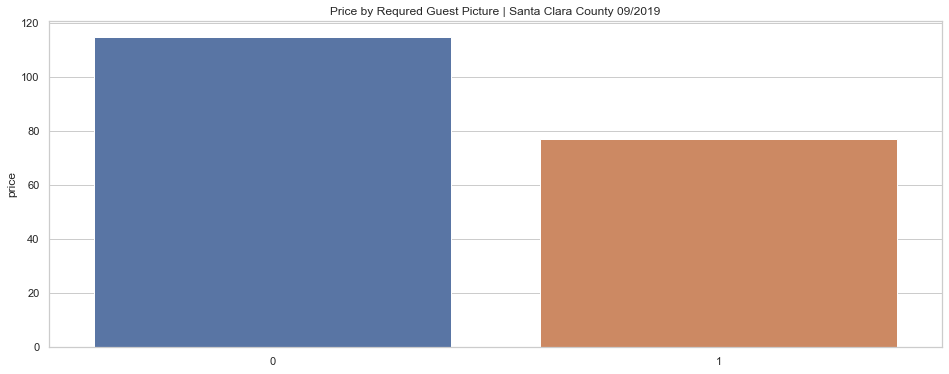

In [435]:
#Hypothesis: host greets you = labor costs and higher price
#Actually the opposite is true!
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="host_greets_you", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by Requred Guest Picture | Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

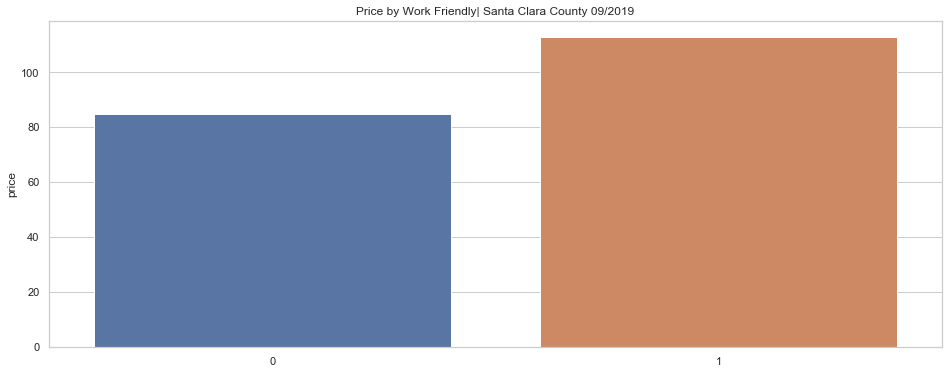

In [438]:
#Hypothesis: work friendly costs more
#Yes!
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="laptop_friendly_workspace", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by Work Friendly| Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

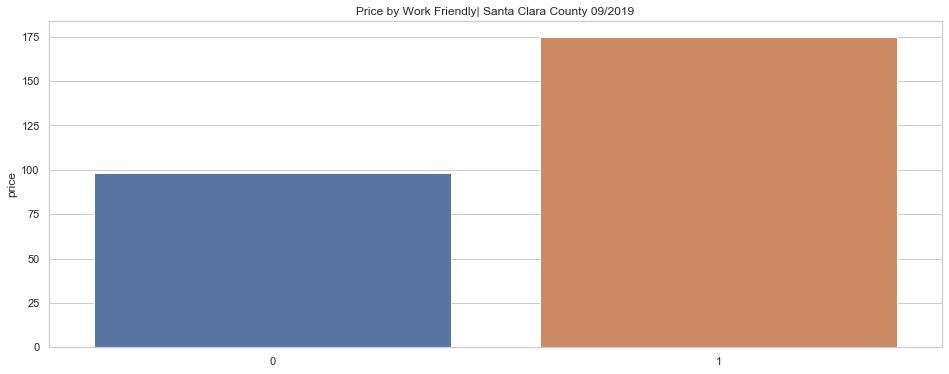

In [439]:
#Hypothesis: It's not cheap to travel with pets!
#Yes! The median is $75 higher
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="pets_allowed", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by Pets Allowed| Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

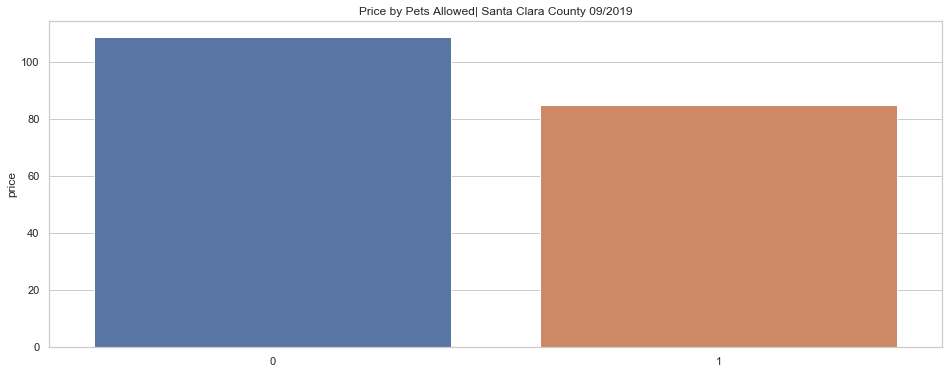

In [440]:
#Hypothesis: However, it's cheaper to bear with the pets
#You get $20 discount for bearing with that
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="pets_live_on_this_property", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by Pets Allowed| Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

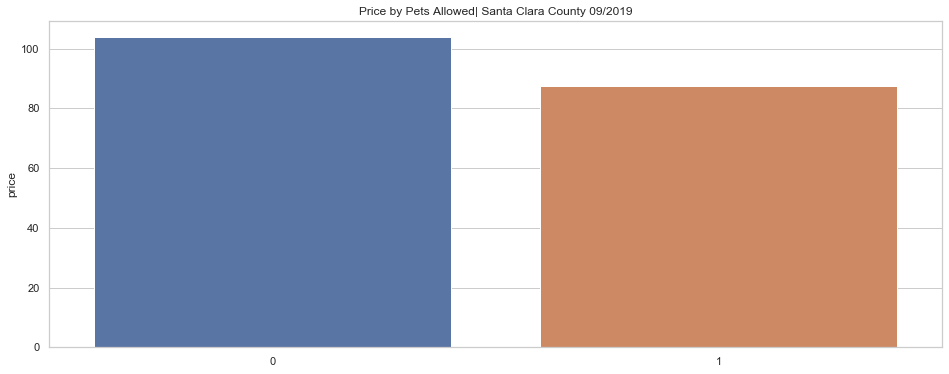

In [445]:
#Hypothesis: smoking is an expensive habit
#Actually no! Maybe those are crappier places
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="smoking_allowed", y="price", data=airbnb, estimator=median, ci=None)
ax.set_title("Price by Pets Allowed| Santa Clara County 09/2019")
ax.set_xlabel('')
plt.show()

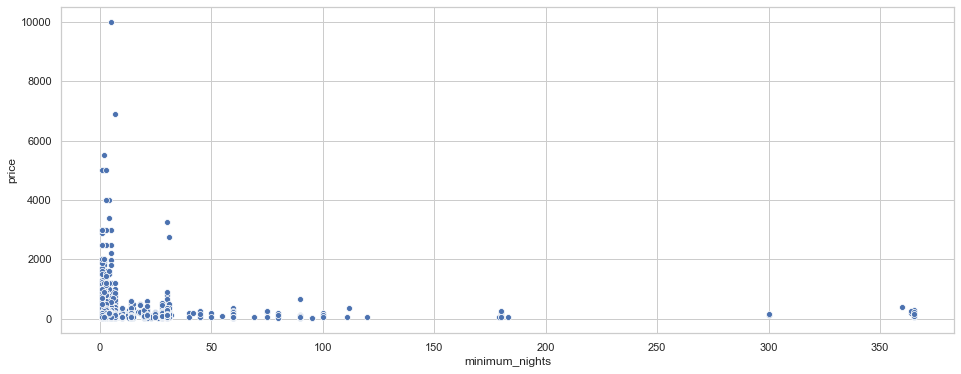

In [417]:
#Hypothese: longer minimum nights, lower price for discount
#Generally tru

plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="minimum_nights", y="price", data=airbnb)
plt.show()

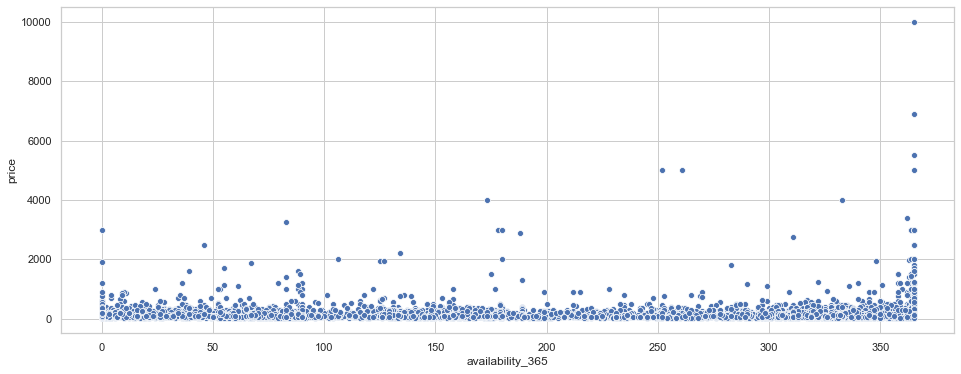

In [421]:
#Hypothese: more available nights, higher the price
#Seems true only on the extremely high end 

plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="availability_365", y="price", data=airbnb)
plt.show()

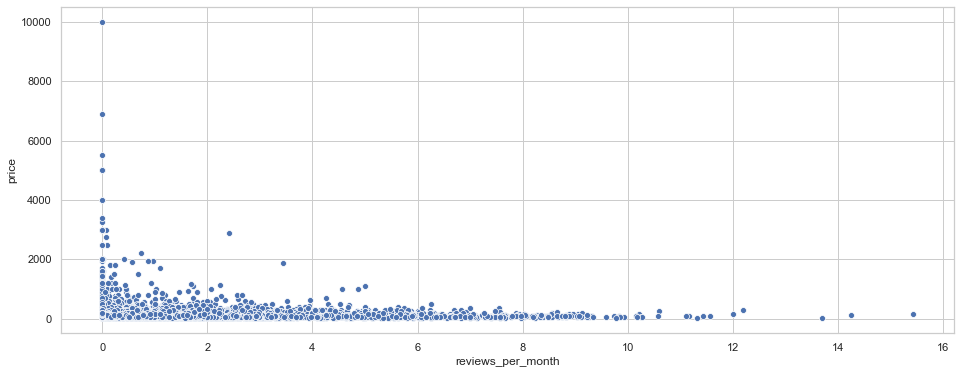

In [427]:
#Hypothese: less reviews, more assymetric information for guests, lower price
#Seems the opposite, maybe more reviews due to cheaper price

plt.figure(figsize=(16, 6))
ax = sns.scatterplot(x="reviews_per_month", y="price", data=airbnb)
plt.show()

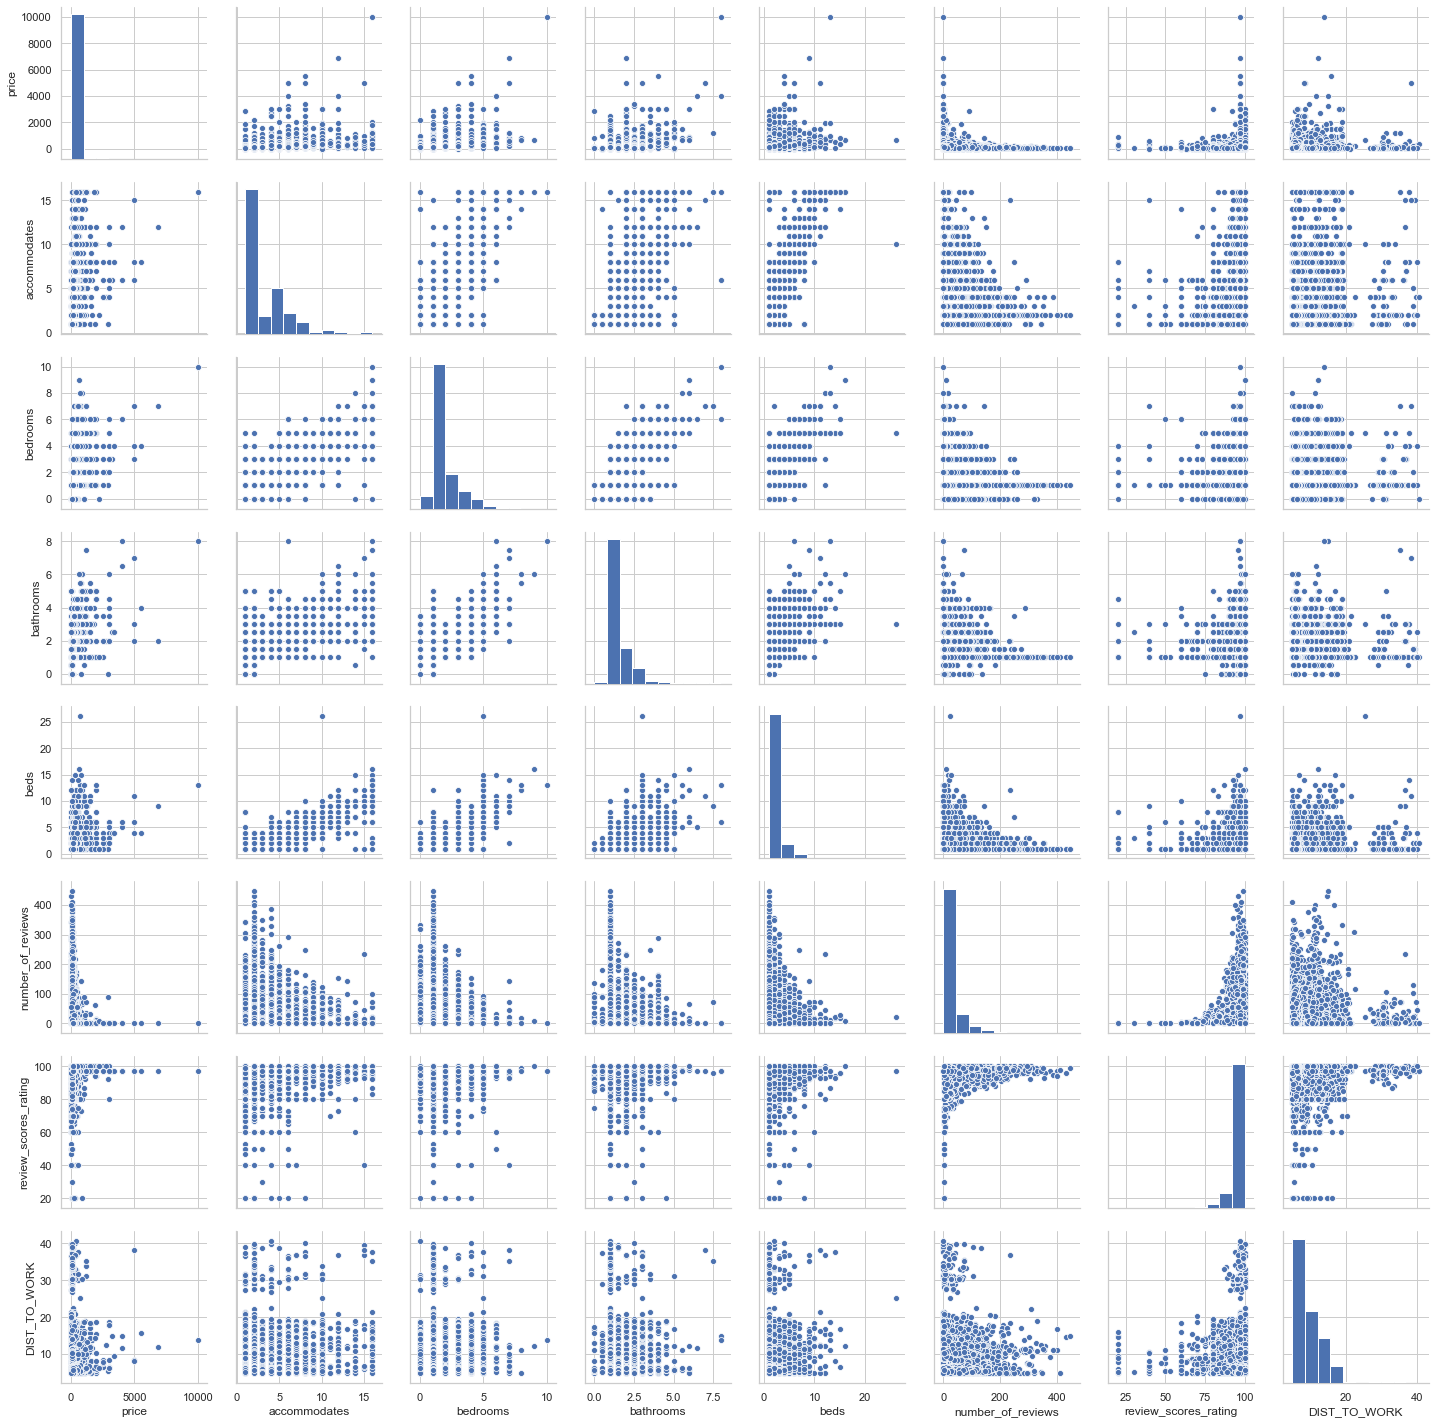

In [451]:
#pair plot essential features and price
#Accomodations, bedrooms, beds, review scores, and distance all seem to be positively related to price

airbnb_essential = airbnb[['price', 'accommodates', 'bedrooms', 'bathrooms', 'beds',
                           'number_of_reviews', 'review_scores_rating','DIST_TO_WORK']]

g = sns.pairplot(airbnb_essential)